In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

2025-10-24 09:30:01.400138: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-10-24 09:30:04.028842: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1761298204.803248    8183 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1761298205.030739    8183 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1761298207.165789    8183 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

In [3]:
# Load MNIST dataset
(X_train, _), (X_test, _) = tf.keras.datasets.mnist.load_data()

# Normalize and flatten images
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.
X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))

In [4]:
# Define the encoder
encoder = models.Sequential([
    layers.Input(shape=(784,)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu')  # Bottleneck layer
])

# Define the decoder
decoder = models.Sequential([
    layers.Input(shape=(64,)),
    layers.Dense(128, activation='relu'),
    layers.Dense(784, activation='sigmoid')  # Reconstructed output
])

# Build the autoencoder model
autoencoder = models.Sequential([encoder, decoder])
autoencoder.compile(optimizer='adam', loss='mse')

# Train the autoencoder
autoencoder.fit(X_train, X_train, epochs=20, batch_size=256, validation_data=(X_test, X_test))

2025-10-24 09:31:38.509891: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0920 - val_loss: 0.0301
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0263 - val_loss: 0.0181
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0173 - val_loss: 0.0142
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0139 - val_loss: 0.0120
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0121 - val_loss: 0.0109
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0109 - val_loss: 0.0103
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0101 - val_loss: 0.0092
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0094 - val_loss: 0.0086
Epoch 9/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0088 - val_loss: 0.0081
Epoch 10/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0083 - val_loss: 0.0078
Epoch 11/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0079 - val_loss: 0.0075
Epoch 12/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step

In [5]:
# Predict reconstructed images
reconstructed_images = autoencoder.predict(X_test)

# Calculate the mean squared error
mse = np.mean(np.square(X_test - reconstructed_images))
print(f'Autoencoder Reconstruction MSE: {mse}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 986us/step
Autoencoder Reconstruction MSE: 0.005764516070485115


In [6]:
# Define the generator
def build_generator():
    model = models.Sequential([
        layers.Input(shape=(100,)),
        layers.Dense(128, activation='relu'),
        layers.Dense(784, activation='sigmoid')  # Output: 28x28 flattened image
    ])
    return model

# Define the discriminator
def build_discriminator():
    model = models.Sequential([
        layers.Input(shape=(784,)),
        layers.Dense(128, activation='relu'),
        layers.Dense(1, activation='sigmoid')  # Output: Probability (real or fake)
    ])
    return model

In [7]:
generator = build_generator()
discriminator = build_discriminator()

discriminator.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Stack the generator and discriminator
gan = models.Sequential([generator, discriminator])
discriminator.trainable = False
gan.compile(optimizer='adam', loss='binary_crossentropy')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


/anaconda/envs/azureml_py38_PT_TF/lib/python3.10/site-packages/keras/src/backend/tensorflow/trainer.py:83: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


Epoch 0, Discriminator Loss: 0.9633792042732239, Generator Loss: 0.9287428855895996
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


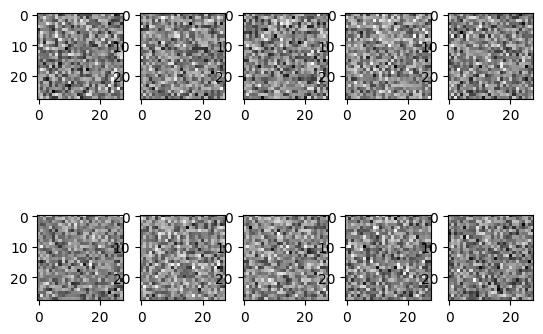

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━

In [ ]:
# Training GAN
epochs = 10000
batch_size = 64
half_batch = batch_size // 2

for epoch in range(epochs):
    # Real images
    idx = np.random.randint(0, X_train.shape[0], half_batch)
    real_images = X_train[idx]
    real_labels = np.ones((half_batch, 1))

    # Fake images
    noise = np.random.normal(0, 1, (half_batch, 100))
    fake_images = generator.predict(noise)
    fake_labels = np.zeros((half_batch, 1))

    # Train the discriminator
    d_loss_real = discriminator.train_on_batch(real_images, real_labels)
    d_loss_fake = discriminator.train_on_batch(fake_images, fake_labels)

    # Train the generator (via GAN model)
    noise = np.random.normal(0, 1, (batch_size, 100))
    gan_labels = np.ones((batch_size, 1))  # Try to fool the discriminator
    g_loss = gan.train_on_batch(noise, gan_labels)

    # Every 1000 epochs, print losses and visualize generated images
    if epoch % 1000 == 0:
        print(f"Epoch {epoch}, Discriminator Loss: {d_loss_real[0]}, Generator Loss: {g_loss}")
        # Generate and display images
        generated_images = generator.predict(np.random.normal(0, 1, (10, 100)))
        for i in range(10):
            plt.subplot(2, 5, i+1)
            plt.imshow(generated_images[i].reshape(28, 28), cmap='gray')
        plt.show()